<a href="https://colab.research.google.com/github/karthickselvkumar/logisticregression-ML-project/blob/main/%20MLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [8]:
#people who left
left = df[df.left == 1]
left.shape

(3571, 10)

In [9]:
#people who retained
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [15]:
#Attrition
attrition = (3571/14999 * 100)
print(attrition)

23.80825388359224


In [25]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [26]:
#FROM THIS, MY ANALYSIS ARE
#1. SATISFACTION LEVEL IS LOWER FOR PEOPLE WHO LEFT.
#2. NUMBER OF PROJECTS WERE HIGHER FOR PEOPLE WHO LEFT.
#3. AVERAGE MONTHLY HOURS WERE HIGHER
#4. PROMOTION WERE LESS FOR PEOPLE WHO LEFT.

In [32]:
#salary on retention and left
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

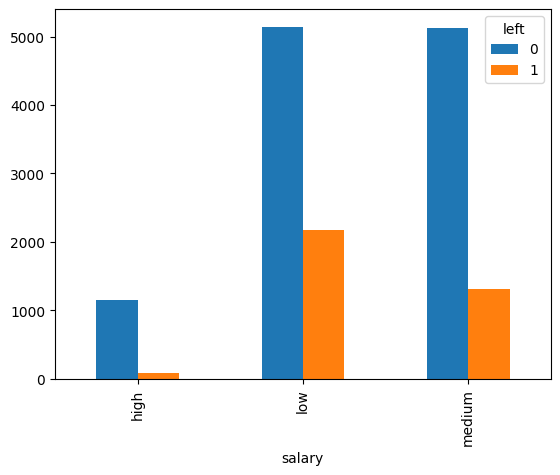

In [34]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

In [39]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [71]:
salaries_dummies = pd.get_dummies(subdf.salary, prefix='salary')
df_with_dummies = pd.concat([subdf, salaries_dummies], axis='columns')
display(df_with_dummies.head())

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_encoded,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,False,True,False
1,0.80,262,0,medium,1,False,False,True
2,0.11,272,0,medium,1,False,False,True
3,0.72,223,0,low,0,False,True,False
4,0.37,159,0,low,0,False,True,False


In [77]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_encoded
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [80]:
x= df_with_dummies
y = df.left
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
x_test[13:14]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_encoded
8216,0.39,179,0,0


In [81]:
y_test[14:15]

,left
3438,0


In [83]:
model.predict(x_test[13:14])

array([0])

In [84]:
model.score(x_test,y_test)

0.7813333333333333

In [85]:
y_predict = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2293
           1       0.58      0.27      0.37       707

    accuracy                           0.78      3000
   macro avg       0.69      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



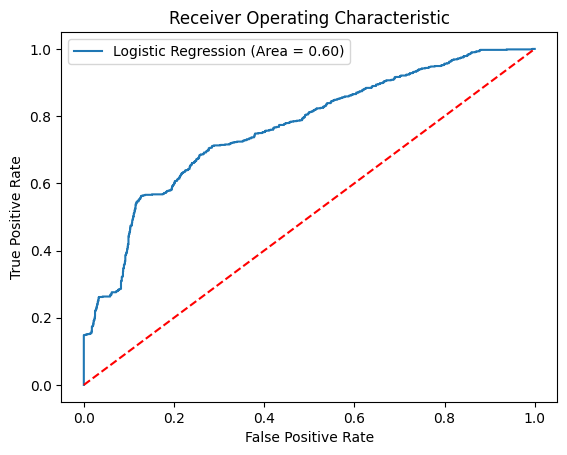

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logitc_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (Area = {logitc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()